<a href="https://colab.research.google.com/github/Thib433/MPA-MLF-Thibaud-Doireau-2025/blob/main/Ex_07_Thibaud_Doireau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

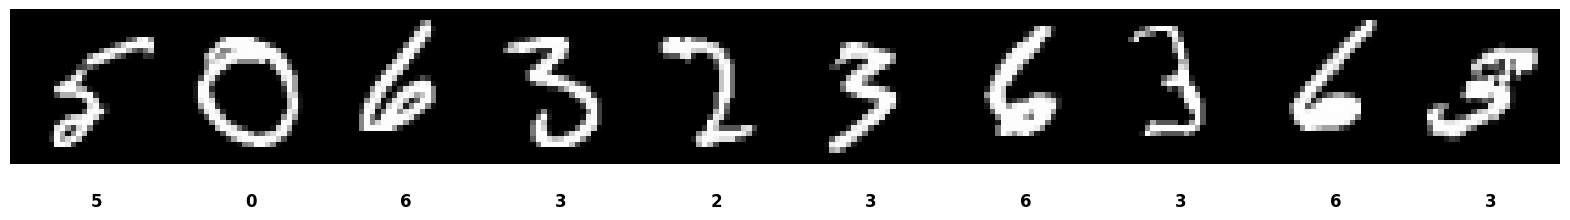

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

**ANSWER TO QUESTIONS**

1/ image labélisé
2/ 60000 labels in train (shape[0])
Idem pour test

3/ 1 channel (grayscale)
4/ 28 x 28
5/ We need to normalize by the number of ...
6/ 10 class from "0" to "9"
7/ one-hot encoding

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
###################################
# Write your own code here #
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the data to add a channel dimension (for cnn input)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


###################################

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [ ]:
model = Sequential()
###################################
# Write your own code here #
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='softmax'))
model.add(Dense(10, activation='softmax'))

###################################


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
###################################
# Write your own code here #
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
###################################
# Write your own code here #

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test,y_test), verbose=2)

###################################

Epoch 1/10
469/469 - 32s - 68ms/step - accuracy: 0.7744 - loss: 1.7684 - val_accuracy: 0.8554 - val_loss: 1.3955
Epoch 2/10
469/469 - 38s - 80ms/step - accuracy: 0.8601 - loss: 1.1465 - val_accuracy: 0.8763 - val_loss: 0.9156
Epoch 3/10
469/469 - 43s - 91ms/step - accuracy: 0.8798 - loss: 0.7654 - val_accuracy: 0.8841 - val_loss: 0.6310
Epoch 4/10
469/469 - 39s - 84ms/step - accuracy: 0.8884 - loss: 0.5464 - val_accuracy: 0.8912 - val_loss: 0.4734
Epoch 5/10
469/469 - 41s - 88ms/step - accuracy: 0.8997 - loss: 0.4185 - val_accuracy: 0.9151 - val_loss: 0.3728
Epoch 6/10
469/469 - 40s - 86ms/step - accuracy: 0.9715 - loss: 0.2766 - val_accuracy: 0.9762 - val_loss: 0.2254
Epoch 7/10
469/469 - 27s - 57ms/step - accuracy: 0.9832 - loss: 0.1826 - val_accuracy: 0.9804 - val_loss: 0.1703
Epoch 8/10
469/469 - 27s - 57ms/step - accuracy: 0.9855 - loss: 0.1390 - val_accuracy: 0.9808 - val_loss: 0.1392
Epoch 9/10
469/469 - 41s - 88ms/step - accuracy: 0.9876 - loss: 0.1104 - val_accuracy: 0.9824 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

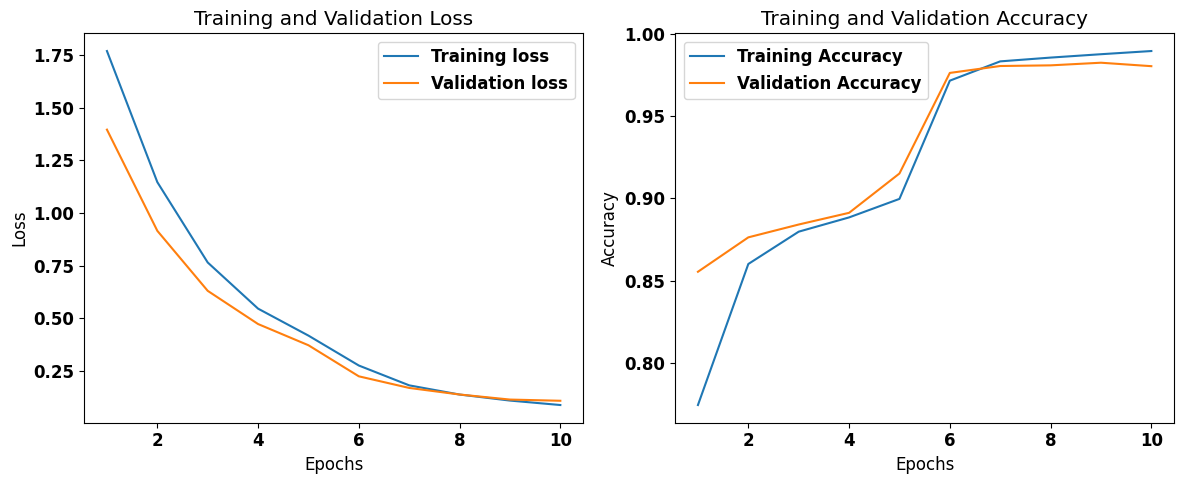

In [ ]:
###################################
# Write your own code here #
history_dict = history.history

# Loss
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Accuracy
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Nombre d'époques
epochs = range(1, len(train_loss) + 1)
# Plot de la loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 - 4s - 13ms/step - accuracy: 0.9803 - loss: 0.1095
Test accuracy: 0.9803
Test loss: 0.1095
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


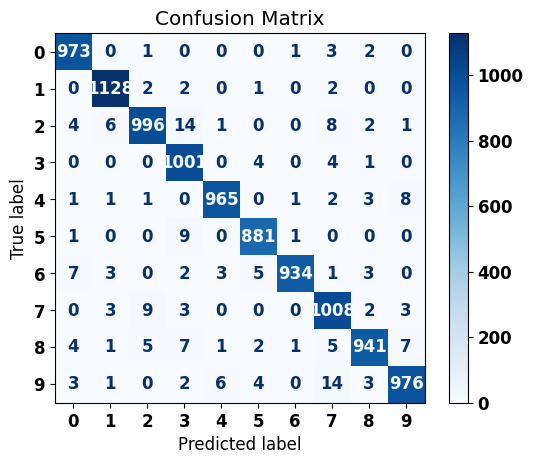

In [ ]:
###################################
# Write your own code here #
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions : on obtient des probabilités → on prend l'argmax
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Vraies classes (elles sont one-hot, donc on fait aussi argmax)
y_true = np.argmax(y_test, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Training model: Baseline ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


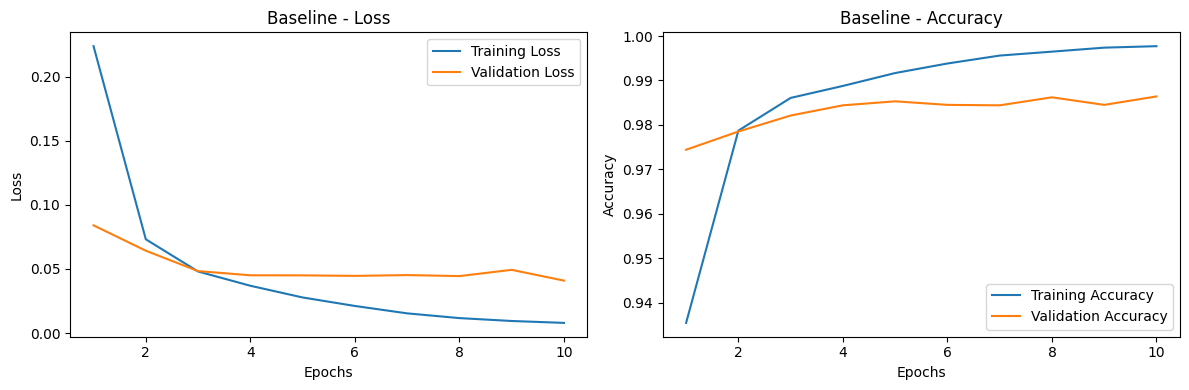

Baseline - Test accuracy: 0.9864 | Test loss: 0.0409
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


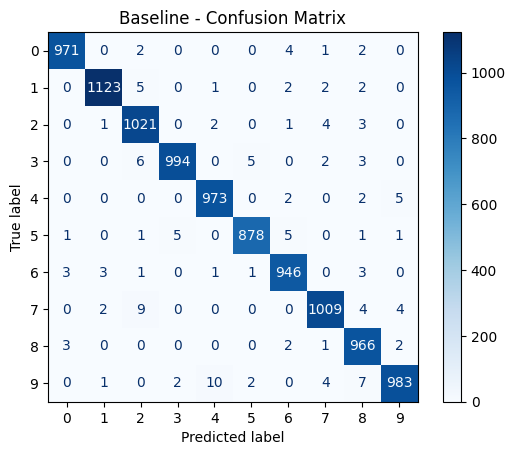


--- Training model: With Dropout ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


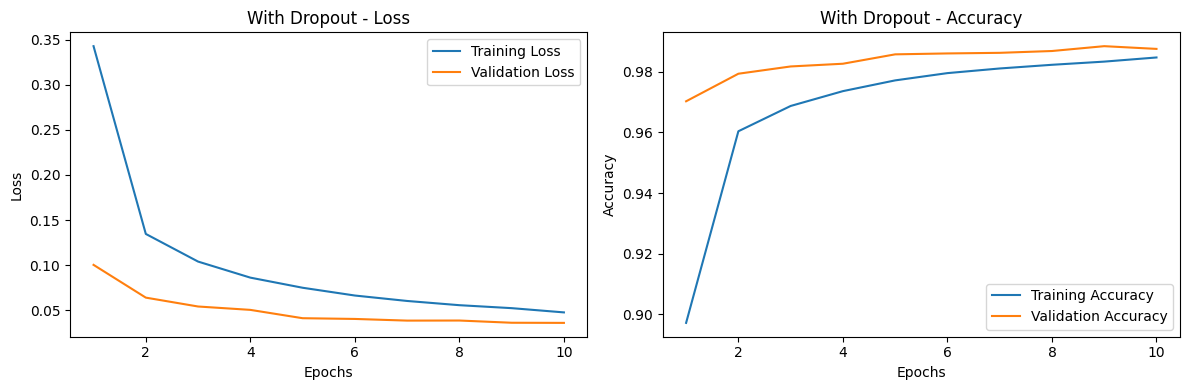

With Dropout - Test accuracy: 0.9876 | Test loss: 0.0359
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


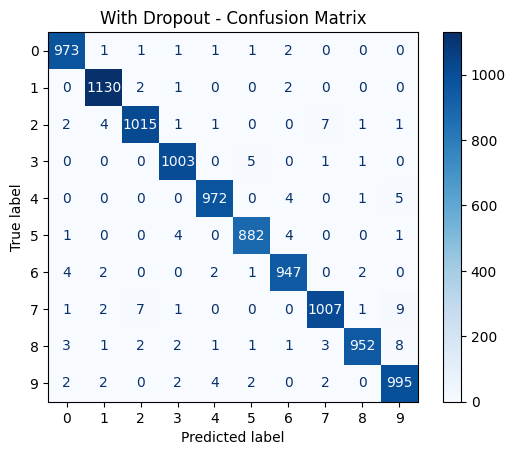


--- Training model: L2 Regularization ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


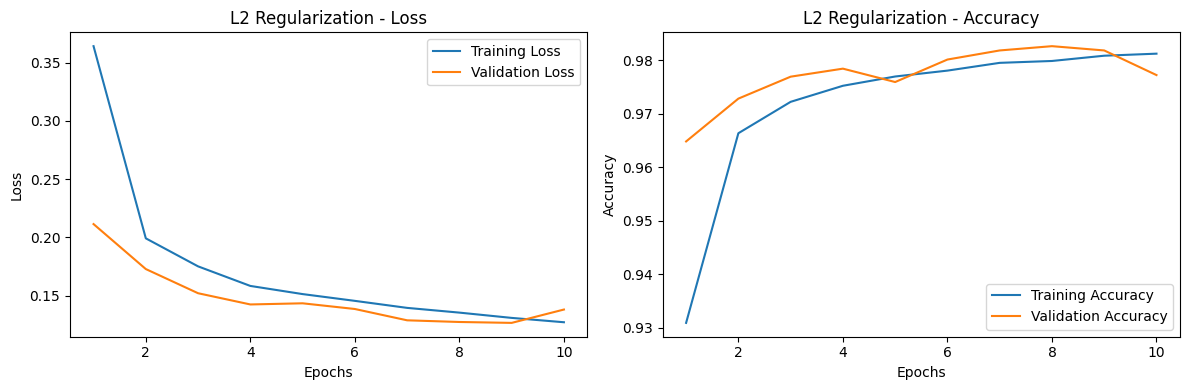

L2 Regularization - Test accuracy: 0.9772 | Test loss: 0.1381
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


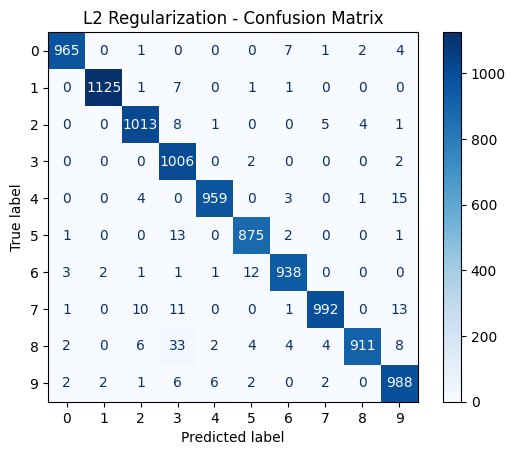


--- Training model: L1 Regularization ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


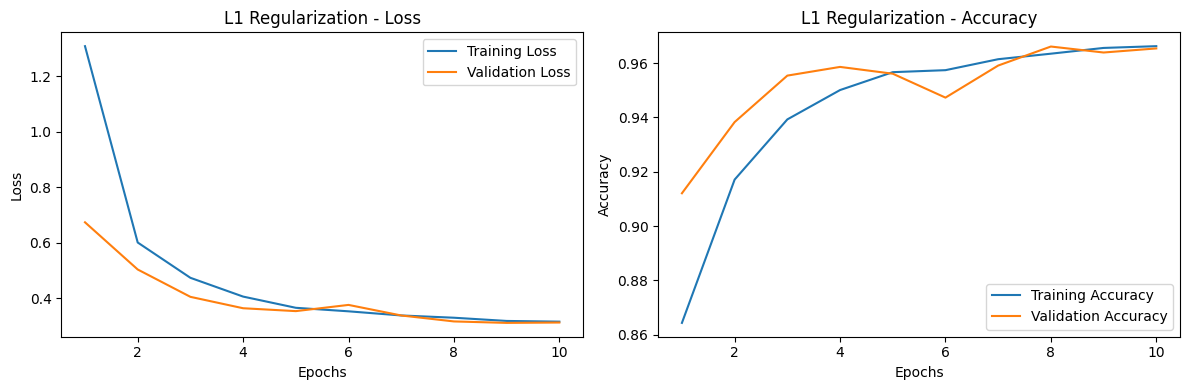

L1 Regularization - Test accuracy: 0.9654 | Test loss: 0.3116
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


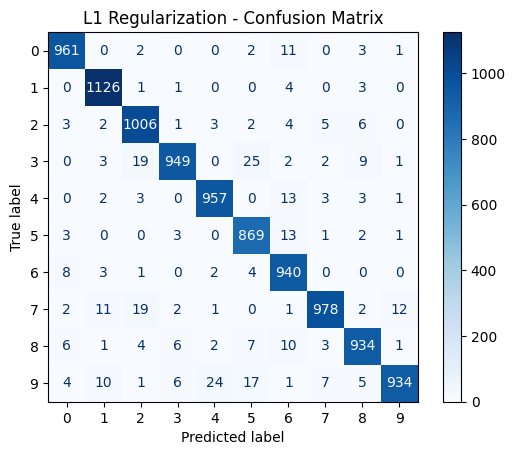


--- Training model: Dropout + L2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


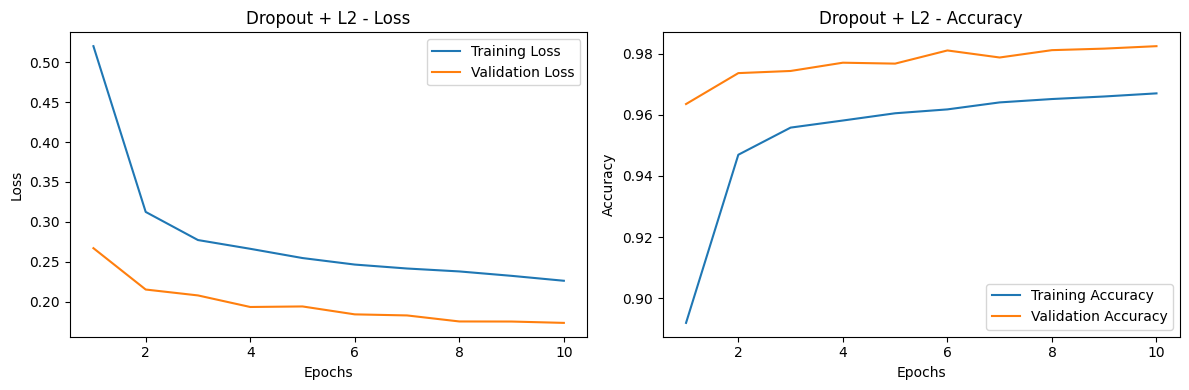

Dropout + L2 - Test accuracy: 0.9824 | Test loss: 0.1736
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


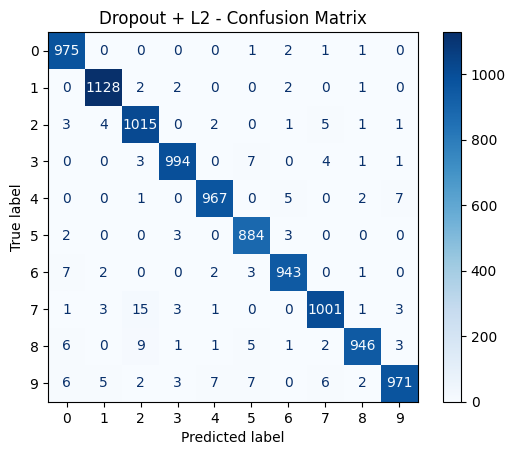


--- Training model: Lower LR ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


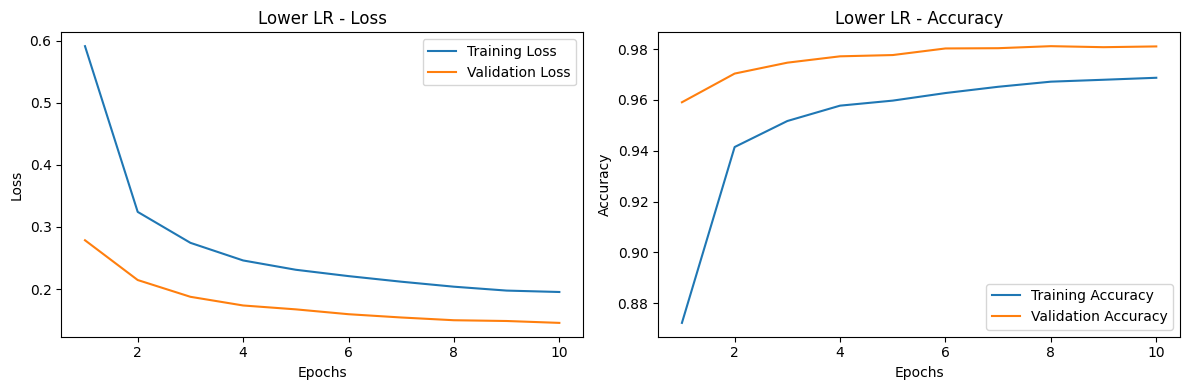

Lower LR - Test accuracy: 0.9811 | Test loss: 0.1454
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


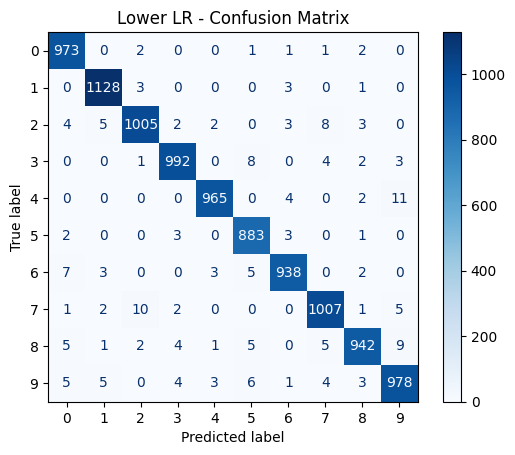

In [ ]:
#Import other library
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.datasets import mnist

#preparation of data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Model builder and display function
def build_model(use_dropout=False, reg_type=None, reg_value=0.0, learning_rate=0.001):
    regularizer = None
    if reg_type == "l1":
        regularizer = l1(reg_value)
    elif reg_type == "l2":
        regularizer = l2(reg_value)

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizer, input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    if use_dropout:
        model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizer))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_metrics(history, title):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['loss'], label='Training Loss')
    plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

def evaluate_and_display(model, title):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'{title} - Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}')

    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{title} - Confusion Matrix')
    plt.show()

# List of experiments to run:
experiments = [
    {"name": "Baseline", "dropout": False, "reg": None, "reg_value": 0.0, "lr": 0.001},
    {"name": "With Dropout", "dropout": True, "reg": None, "reg_value": 0.0, "lr": 0.001},
    {"name": "L2 Regularization", "dropout": False, "reg": "l2", "reg_value": 0.001, "lr": 0.001},
    {"name": "L1 Regularization", "dropout": False, "reg": "l1", "reg_value": 0.001, "lr": 0.001},
    {"name": "Dropout + L2", "dropout": True, "reg": "l2", "reg_value": 0.001, "lr": 0.001},
    {"name": "Lower LR", "dropout": True, "reg": "l2", "reg_value": 0.001, "lr": 0.0005},
]

for exp in experiments:
    print(f"\n--- Training model: {exp['name']} ---")
    model = build_model(use_dropout=exp["dropout"],
                        reg_type=exp["reg"],
                        reg_value=exp["reg_value"],
                        learning_rate=exp["lr"])

    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=0)

    plot_metrics(history, exp["name"])
    evaluate_and_display(model, exp["name"])


We tested several network structures by modifying hyperparameters such as:
- The size of the network
- The use of dropout, L2, and L1 regularization
- Reducing the learning rate

We observed that:
- The "baseline model" (without regularization) quickly overfits (visible overfitting on the loss curves).
- Adding Dropout or L2 regularization significantly reduces this effect.
- The combination of Dropout + L2 provides the best trade-off between performance and generalization.

We have therefore reduced overfitting while maintaining good accuracy on the test data.
